In [250]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [251]:
from ISLP import load_data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [252]:
Boston = load_data('Boston')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


<Axes: >

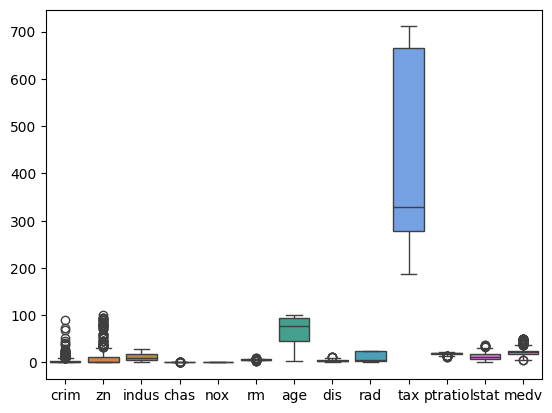

In [253]:
sns.boxplot(data=Boston)

In [254]:
def outlier(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 5 * IQR
    upper_bound = Q3 + 5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [255]:
for column in Boston.columns:
    Boston=Boston.drop(outlier(Boston, column).index)
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,455.000000,455.000000,455.000000,455.0,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,2.465152,12.043956,10.770198,0.0,0.547329,6.290382,66.960879,3.931450,9.059341,400.863736,18.468352,12.372022,22.535165
std,4.384432,23.927576,6.903394,0.0,0.112277,0.676702,28.466989,2.139681,8.463630,164.691044,2.170225,6.876052,8.639080
min,0.006320,0.000000,0.460000,0.0,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,1.730000,6.300000
25%,0.076890,0.000000,4.930000,0.0,0.448000,5.895500,42.000000,2.177750,4.000000,280.500000,17.350000,6.925000,17.400000
50%,0.222120,0.000000,8.560000,0.0,0.532000,6.216000,74.300000,3.370000,5.000000,330.000000,19.100000,11.100000,21.200000
75%,2.413010,20.000000,18.100000,0.0,0.614000,6.611000,93.600000,5.400700,8.000000,453.000000,20.200000,16.430000,25.000000
max,20.716200,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [256]:
X = np.stack([np.ones(Boston.shape[0]), Boston['lstat']]).T
X.shape

(455, 2)

In [257]:
y = Boston['medv'].to_numpy()
y.shape

(455,)

In [258]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
model.coef_

array([33.84522877, -0.91416455])

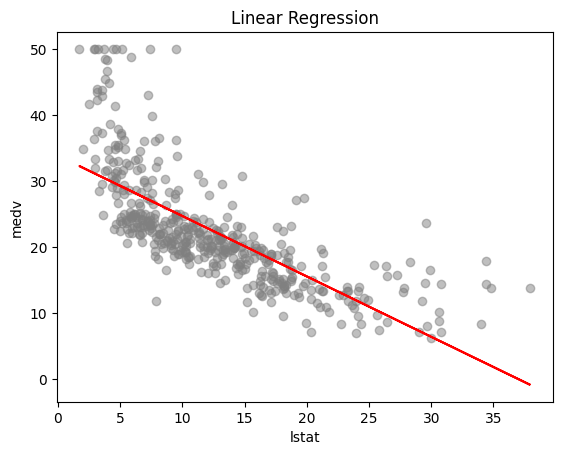

In [259]:
results = model.predict(X)
model.score(X, y)  # R^2
plt.scatter(Boston['lstat'], Boston['medv'], color='gray', alpha=0.5)
plt.plot(Boston['lstat'], results, color='red')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('Linear Regression')
plt.show()

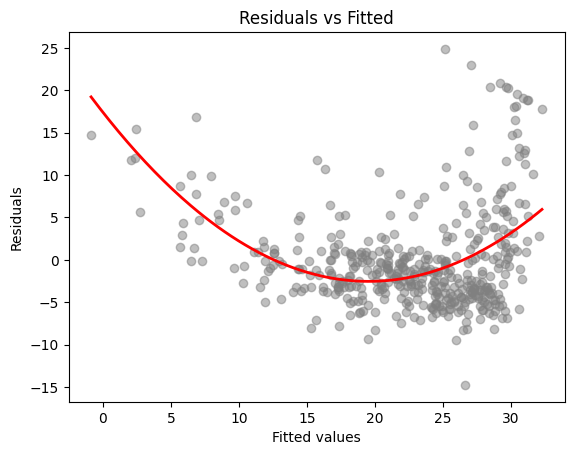

In [260]:
residuals = y - results

poly1 = PolynomialFeatures(degree=2, include_bias=True)
X_1 = poly1.fit_transform(results.reshape(-1,1))
model1 = LinearRegression(fit_intercept=False).fit(X_1, residuals)

x_grid = np.linspace(results.min(), results.max(), 200)
Xg = poly1.transform(x_grid.reshape(-1,1))
y_grid = model1.predict(Xg)

plt.scatter(results, residuals, color='gray', alpha=0.5)
plt.plot(x_grid, y_grid, color='red', linewidth=2)
plt.xlabel('Fitted values'); plt.ylabel('Residuals'); plt.title('Residuals vs Fitted')
plt.show()

In [261]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)        
ols = sm.OLS(y, X_sm).fit()      
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     509.6
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           3.67e-76
Time:                        11:56:35   Log-Likelihood:                -1454.7
No. Observations:                 455   AIC:                             2913.
Df Residuals:                     453   BIC:                             2922.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8452      0.573     59.063      0.0

In [262]:
X_sm = sm.add_constant(X)              # 加截距
res = sm.OLS(y, X_sm).fit()
print(res.summary())                   # 包含 coef, std err, t, P>|t|
print(res.conf_int(alpha=0.05))        # 系数95%置信区间

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     509.6
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           3.67e-76
Time:                        11:56:35   Log-Likelihood:                -1454.7
No. Observations:                 455   AIC:                             2913.
Df Residuals:                     453   BIC:                             2922.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8452      0.573     59.063      0.0

In [263]:
new_df = pd.DataFrame({'lstat': [5, 10, 15]})
X_new = np.stack([np.ones(new_df.shape[0]), new_df['lstat']]).T
X_sm = sm.add_constant(X)         
res = sm.OLS(y, X_sm).fit()
new_prediction = res.get_prediction(X_new)
print(new_prediction.conf_int(alpha=0.05)) 
print(new_prediction.conf_int(obs = True,alpha=0.05))     

[[28.47255721 30.0762548 ]
 [24.12530288 25.28186361]
 [19.54751418 20.71800679]]
[[17.5874285  40.96138351]
 [13.02981394 36.37735255]
 [ 8.45864403 31.80687693]]


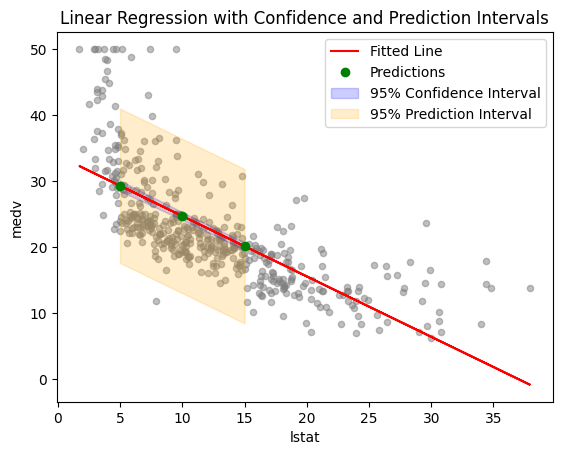

In [264]:
ax = Boston.plot(kind='scatter', x='lstat', y='medv', color='gray', alpha=0.5)
plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('Linear Regression with Confidence and Prediction Intervals')
plt.plot(Boston['lstat'], results, color='red', label='Fitted Line')
plt.plot(new_df['lstat'], new_prediction.predicted_mean, 'go', label='Predictions')
plt.fill_between(new_df['lstat'], new_prediction.conf_int()[:, 0], new_prediction.conf_int()[:, 1], color='blue', alpha=0.2, label='95% Confidence Interval')
plt.fill_between(new_df['lstat'], new_prediction.conf_int(obs=True)[:, 0], new_prediction.conf_int(obs=True)[:, 1], color='orange', alpha=0.2, label='95% Prediction Interval')
plt.legend()
plt.show() 

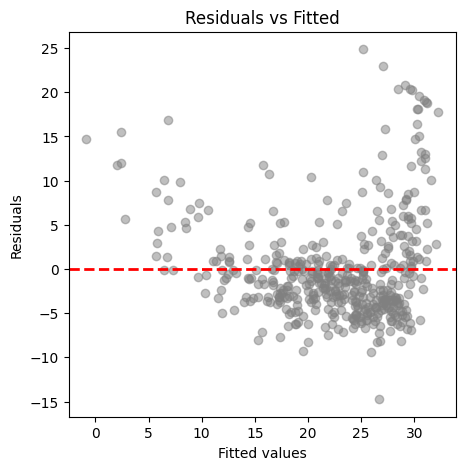

In [265]:
ax = plt.subplots(figsize=(5, 5))[1]
ax.scatter(results.reshape(-1,1), residuals, color='gray', alpha=0.5)
ax.axhline(0, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Fitted')
plt.show()

In [266]:
type(results)

numpy.ndarray

In [267]:
infl = ols.get_influence()
np.argmax(infl.hat_matrix_diag)

np.int64(339)

In [268]:
X = Boston[['lstat','age']]
model2 = LinearRegression().fit(X, y)
print(model2.intercept_,model2.coef_)

32.872580489705186 [-0.98392956  0.02741575]


In [269]:
x_all= Boston.drop(columns=['medv'])
model3 = LinearRegression().fit(x_all, y)
print(model3.intercept_,model3.coef_)

37.12094294556671 [-1.82287910e-01  4.25604764e-02  1.19140330e-03  3.97147593e-14
 -1.38767588e+01  3.98732238e+00 -6.86763951e-03 -1.39758452e+00
  2.86092390e-01 -1.39731028e-02 -9.23143425e-01 -4.95927789e-01]


In [270]:
x_minus_age = Boston.drop(columns=['medv','age'])
model4 = LinearRegression().fit(x_minus_age, y)
print(model4.intercept_,model4.coef_)

37.39266074099099 [-1.81474560e-01  4.32424438e-02  1.71192722e-03  1.98868699e-14
 -1.45019001e+01  3.94132364e+00 -1.36887402e+00  2.88940181e-01
 -1.40163825e-02 -9.29722358e-01 -5.05281125e-01]


In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [272]:
x

,lstat,age,lstatage
0,4.98,65.2,324.696
1,9.14,78.9,721.146
2,4.03,61.1,246.233
3,2.94,45.8,134.652
4,5.33,54.2,288.886
...,...,...,...
501,9.67,69.1,668.197
502,9.08,76.7,696.436
503,5.64,91.0,513.240
504,6.48,89.3,578.664


In [273]:
X_with_const = sm.add_constant(x_all)
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [VIF(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print(vif_data)

    feature         VIF
0     const  539.606470
1      crim    4.459431
2        zn    2.303843
3     indus    3.812132
4      chas         NaN
5       nox    4.452872
6        rm    1.823624
7       age    3.055787
8       dis    3.906831
9       rad    8.722985
10      tax    7.886027
11  ptratio    1.719455
12    lstat    3.072874


/Users/quant1wen/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [274]:
vals = [VIF(x_all.values, i) for i in range(x_all.shape[1])]

/Users/quant1wen/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [275]:
x_all['lstatage'] = x_all['lstat'] * x_all['age']
x = x_all[['lstat','age','lstatage']]
model5 = LinearRegression()
model5.fit(x, y)

LinearRegression()

In [276]:
model5.coef_

array([-1.3420427 , -0.00908112,  0.00420952])

In [277]:
poly = PolynomialFeatures(degree=2, include_bias=False)
lstat_poly = poly.fit_transform(x[['lstat']].to_numpy()) 
age = Boston[['age']].to_numpy()
X = np.hstack([lstat_poly, age])
y = Boston['medv'].to_numpy()
model6 = LinearRegression()
model6.fit(X, y)
pd.DataFrame(model6.coef_, index=['lstat', 'lstat^2', 'age'], columns=['Coefficient'])

,Coefficient
lstat,-2.646633
lstat^2,0.050008
age,0.065202


In [278]:
from ISLP.models import ModelSpec as MS

In [285]:
poly_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly_5 = poly_5.fit_transform(Boston[['lstat']].to_numpy())
model7 = LinearRegression()
model7.fit(X_poly_5, y)
pd.DataFrame(model7.coef_, index=['lstat', 'lstat^2', 'lstat^3', 'lstat^4', 'lstat^5'], columns=['Coefficient'])    

,Coefficient
lstat,-11.330954
lstat^2,1.202188
lstat^3,-0.064796
lstat^4,0.001646
lstat^5,-0.000016


/Users/quant1wen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/quant1wen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/quant1wen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


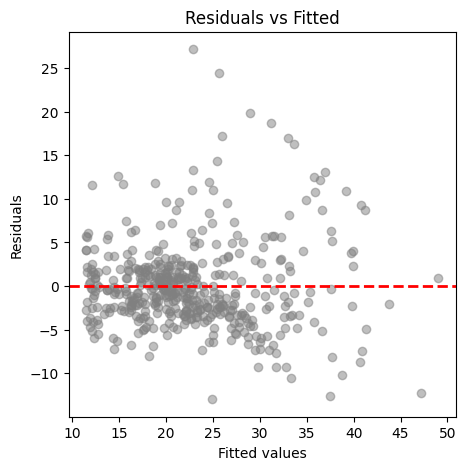

In [288]:
ax = plt.subplots(figsize=(5, 5))[1]
fittedvalues = model7.predict(X_poly_5)
residuals = y - fittedvalues
ax.scatter(fittedvalues, residuals, color='gray', alpha=0.5)
ax.axhline(0, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Fitted')
plt.show()

In [338]:
Carseats = load_data('Carseats')
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [339]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

num_cols = Carseats.drop(columns=['Sales']).select_dtypes(include='number').columns
cat_cols = Carseats.drop(columns=['Sales']).select_dtypes(exclude='number').columns

X = Carseats.drop(columns=['Sales'])
y = Carseats['Sales']

pre = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

model = make_pipeline(pre, LinearRegression())
model.fit(X, y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['ShelveLoc', 'Urban', 'US'], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [340]:
pd.DataFrame(model.named_steps['linearregression'].coef_,
             index=np.concatenate([num_cols, model.named_steps['columntransformer'].named_transformers_['cat'].get_feature_names_out(cat_cols)]),
             columns=['Coefficient'])  

,Coefficient
CompPrice,0.092815
Income,0.015803
Advertising,0.123095
Population,0.000208
Price,-0.095358
Age,-0.046045
Education,-0.021102
ShelveLoc_Good,4.850183
ShelveLoc_Medium,1.956715
Urban_Yes,0.122886
